Setup initial fastai stuff

In [3]:
import torch
from fastai.vision.all import *
print("Cuda is available: " + str(torch.cuda.is_available()))
import pathlib
plt = platform.system()
if plt == 'Linux': pathlib.WindowsPath = pathlib.PosixPath

Cuda is available: True


Path to our training data

In [6]:
path = Path('./data')

Label function - what label is this data

In [7]:
def is_albani(path):
  return parent_label(path) == "albani"

Create our dataloader

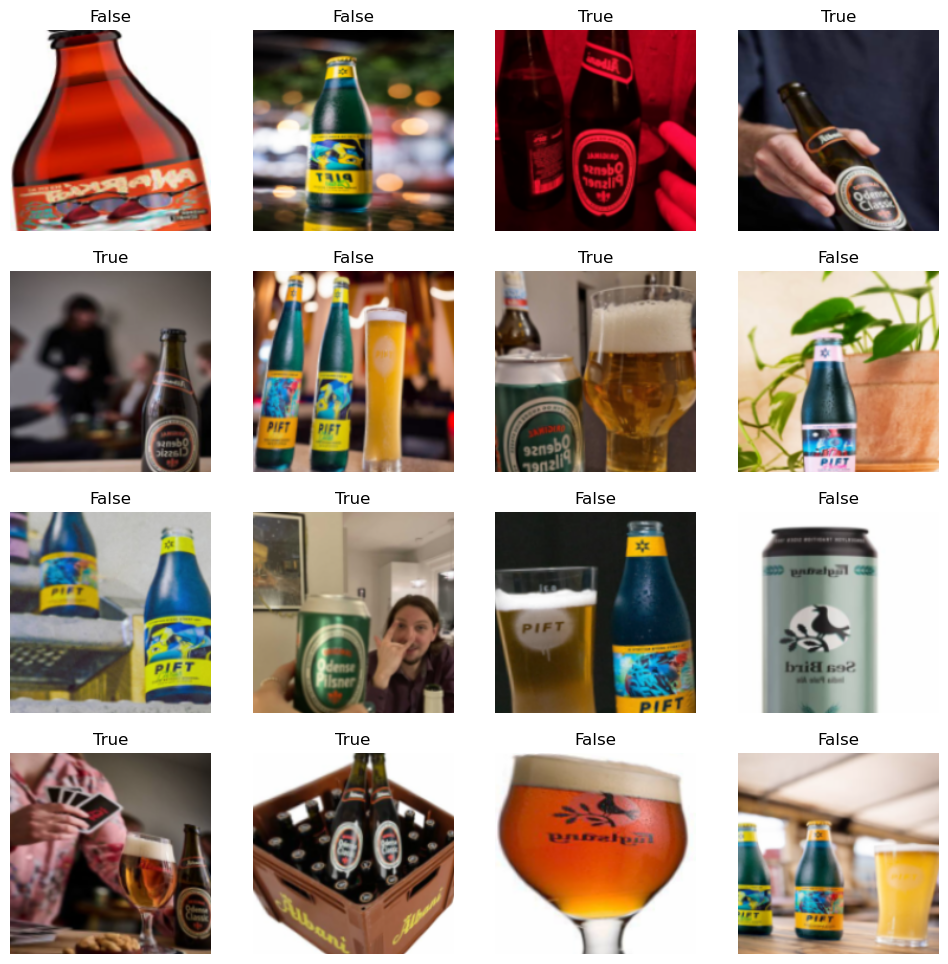

In [10]:
dls = DataBlock(
  blocks=(ImageBlock, CategoryBlock),
  get_items=get_image_files,
  splitter=RandomSplitter(valid_pct=0.2, seed=69420),
  get_y=is_albani,
  item_tfms=[Resize(192, method='squish')],
  batch_tfms=aug_transforms(min_scale=0.5, size=192)
).dataloaders(path, bs=16)

dls.show_batch(max_n=16)

Train ze model

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/home/lord/mambaforge/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/lord/mambaforge/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.770276,0.803168,0.208333,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.350003,0.839528,0.194444,00:02
1,0.311979,0.367392,0.083333,00:02
2,0.242226,0.095805,0.041667,00:02
3,0.178681,0.060777,0.027778,00:02


In [12]:
learn.export('resnet18-albani.pkl')